# Digit Recognizer - CNN with MNIST Data
## Trying to correctly identify digits from a dataset of tens of thousands of handwritten images

This dataset contains more than 40k gray-scale images of hand-drawn digits, from zero through nine. Each image has a shape of 28x28 pixels, for a total of 784 pixels.<br>
After Processing the data and getting the images ready for our model we will use a CNN Image Classification model to try to recognize the digits.<br>

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/competitions/digit-recognizer/overview

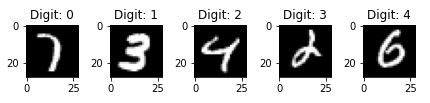

## Import Libraries and Load Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
# loading train data
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Processing

In [3]:
# Split Labels and Images
train_images, train_labels = df.drop(columns='label'), df.label
train_images.shape, train_labels.shape

((42000, 784), (42000,))

In [4]:
# see the num of classes
print("Num of Classes:", train_labels.nunique())

Num of Classes: 10


In [5]:
# form into array and reshape
train_images=np.array(train_images,dtype='float32').reshape((42000, 28, 28, 1))
train_labels=np.array(train_labels,dtype='float32')

In [6]:
# One-hot Encoding
train_labels=pd.get_dummies(train_labels)
print(train_labels.shape)

(42000, 10)


### Split into train and val data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.1, random_state=15)
x_train.shape,y_train.shape, x_val.shape, y_val.shape

((37800, 28, 28, 1), (37800, 10), (4200, 28, 28, 1), (4200, 10))

### Normalize Data

In [8]:
train_images=train_images/255.0
train_labels=train_labels/255.0

## Show Image Examples

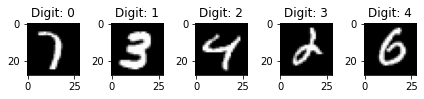

In [9]:
for i in range(5): # show first 5 digit images
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title('Digit: {i}'.format(i=i))
    plt.tight_layout()
plt.show()

## Modeling - Convolutional Neural Netwroks - CNN

In [10]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from keras import models
from keras import layers

In [ ]:
# build model
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10,activation='softmax')) # softmax activation for Classification

In [12]:
# compile model with CategoricalCrossentropy and adam optimizer
model.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer="adam",metrics="accuracy")

In [13]:
# fit model
model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=30)

2022-12-20 18:46:24.017847: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-12-20 18:46:26.250106: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1182/1182 [==============================] - 18s 5ms/step - loss: 0.5480 - accuracy: 0.8624 - val_loss: 0.1362 - val_accuracy: 0.9645
Epoch 2/30
1182/1182 [==============================] - 5s 5ms/step - loss: 0.1318 - accuracy: 0.9635 - val_loss: 0.0649 - val_accuracy: 0.9802
Epoch 3/30
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0974 - accuracy: 0.9728 - val_loss: 0.0687 - val_accuracy: 0.9826
Epoch 4/30
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0807 - accuracy: 0.9767 - val_loss: 0.0843 - val_accuracy: 0.9788
Epoch 5/30
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0716 - accuracy: 0.9802 - val_loss: 0.0927 - val_accuracy: 0.9752
Epoch 6/30
1182/1182 [==============================] - 5s 5ms/step - loss: 0.0598 - accuracy: 0.9833 - val_loss: 0.0718 - val_accuracy: 0.9798
Epoch 7/30
1182/1182 [==============================] - 6s 5ms/step - loss: 0.0530 - accuracy: 0.9850 - val_loss: 0.0636 - val_accuracy: 0.9838
Ep

In [14]:
model.summary() # show summary of model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               7

In [15]:
scores=model.evaluate(x_val, y_val)

132/132 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9883


In [16]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 98.83%


We have an **Accuracy of 98.83%** using our CNN model with 30 epochs.